<h1>Gold Extracted from Ore</h1>

<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

<h3>1. Prepare the data</h3>

<h5>1.1. Open the files and look into the data.</h5><br>
<b>Path to files:</b><br>
/datasets/gold_recovery_train.csv<br>
/datasets/gold_recovery_test.csv<br>
/datasets/gold_recovery_full.csv

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full.csv')
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
output_columns = [
                 'final.output.recovery',
                 'final.output.tail_ag',
                 'final.output.tail_pb',
                 'final.output.tail_sol',
                 'final.output.tail_au',
                 'rougher.input.feed_au',
                 'rougher.input.floatbank10_sulfate',
                 'rougher.input.floatbank10_xanthate',
                 'rougher.input.floatbank11_sulfate',
                 'rougher.input.floatbank11_xanthate',
                  'primary_cleaner.output.tail_ag',
                 'primary_cleaner.output.tail_pb', 
                  'primary_cleaner.output.tail_sol',
                 'primary_cleaner.output.tail_au',
                  'rougher.output.recovery',
                 'rougher.output.tail_ag', 
                  'rougher.output.tail_pb',
                 'rougher.output.tail_sol', 
                  'rougher.output.tail_au',
                  'secondary_cleaner.output.tail_ag', 
                  'secondary_cleaner.output.tail_pb',
                  'secondary_cleaner.output.tail_sol', 
                  'secondary_cleaner.output.tail_au'
 ]

                                  
train_df[output_columns].describe()

,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,primary_cleaner.output.tail_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
count,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,...,16777.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16776.000000,16764.000000,14874.000000,16778.000000
mean,67.213166,8.757048,2.360327,9.303932,2.687512,7.170717,11.198142,5.366609,10.550080,5.792970,...,3.590534,82.394201,5.566579,0.596493,17.865309,1.763930,13.014971,5.320902,6.181742,3.935796
std,11.960446,3.634103,1.215576,4.263208,1.272757,3.002113,3.964080,1.940766,4.560428,1.294180,...,2.028115,15.096808,1.045456,0.330819,3.455588,0.731518,5.960323,3.191103,4.460622,2.675785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000003,0.000049,0.000010,...,0.000000,0.000000,0.594562,0.000000,10.014648,0.020676,0.000000,0.000000,0.000000,0.000000
25%,62.625685,7.610544,1.641604,7.870275,2.172953,6.203083,9.366078,4.802531,8.903492,5.097006,...,2.664223,79.818372,4.918713,0.413711,15.646980,1.311610,11.367185,3.466609,2.045824,2.820390
50%,67.644601,9.220393,2.453690,10.021968,2.781132,7.443530,11.179351,5.767015,11.001027,5.995942,...,3.404941,85.235997,5.718038,0.594959,17.996971,1.747907,14.773117,5.164745,6.194420,3.863798
75%,72.824595,10.971110,3.192404,11.648573,3.416936,8.965193,13.203315,6.501621,13.004085,6.695277,...,4.467152,90.131691,6.308490,0.779544,19.933255,2.190839,17.134159,7.562139,10.252499,4.845187
max,100.000000,19.552149,6.086532,22.317730,9.789625,14.093363,36.118275,31.493331,37.980648,9.698407,...,18.528821,100.000000,12.719177,3.778064,66.117188,9.688980,23.264738,17.042505,33.058594,26.811643


In [6]:
conentration_columns = [
                'final.output.concentrate_ag',
                 'final.output.concentrate_pb',
                 'final.output.concentrate_sol',
                 'final.output.concentrate_au',
                'primary_cleaner.output.concentrate_ag',
                 'primary_cleaner.output.concentrate_pb',
                 'primary_cleaner.output.concentrate_sol',
                 'primary_cleaner.output.concentrate_au',
                'rougher.output.concentrate_ag',
                 'rougher.output.concentrate_pb', 
                  'rougher.output.concentrate_sol',
                'rougher.output.concentrate_au', 
]

train_df[conentration_columns].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
count,16788.000000,16788.000000,16490.000000,16789.000000,16778.000000,16502.000000,16224.000000,16778.000000,16778.000000,16778.000000,16698.000000,16778.000000
mean,4.716907,9.113559,8.301123,39.467217,7.422640,8.620294,9.171453,29.164596,10.580475,6.880322,25.388996,17.401541
std,2.096718,3.389495,3.825760,13.917227,3.105117,3.815415,4.901822,10.983718,4.451490,2.928757,10.400528,6.921875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.971262,8.825748,6.939185,42.055722,6.612584,7.146794,6.477601,29.631129,9.970467,6.346373,24.792988,17.443663
50%,4.869346,10.065316,8.557228,44.498874,7.997143,9.618910,9.295954,32.648867,11.459862,7.583773,28.797785,19.644663
75%,5.821176,11.054809,10.289741,45.976222,9.399463,11.131134,12.747802,35.011318,13.280031,8.503498,31.542677,21.224486
max,16.001945,17.031899,18.124851,53.611374,16.081632,17.081278,22.280845,45.933934,24.480271,18.394042,40.089993,28.522811


In [7]:
input_columns = ['primary_cleaner.input.sulfate',
                 'primary_cleaner.input.depressant',
                 'primary_cleaner.input.feed_size',
                 'primary_cleaner.input.xanthate',
                 'rougher.input.feed_ag',
                 'rougher.input.feed_pb',
                 'rougher.input.feed_rate',
                 'rougher.input.feed_size',
                 'rougher.input.feed_sol',
                 'rougher.input.feed_au',
                 'rougher.input.floatbank10_sulfate',
                 'rougher.input.floatbank10_xanthate',
                 'rougher.input.floatbank11_sulfate',
                 'rougher.input.floatbank11_xanthate'
                ]

train_df[input_columns].describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate
count,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000
mean,129.479789,8.625021,7.297285,0.843812,7.832347,3.218931,435.963431,58.676444,32.636662,7.170717,11.198142,5.366609,10.550080,5.792970
std,45.386931,3.698633,0.619166,0.419098,3.139014,1.477263,156.592162,23.922591,11.661981,3.002113,3.964080,1.940766,4.560428,1.294180
min,0.000003,0.000000,1.080000,0.000005,0.000000,0.000000,0.000044,9.659576,0.000000,0.000000,0.000002,0.000003,0.000049,0.000010
25%,103.064021,6.004886,6.940000,0.568934,6.889426,2.551143,396.667936,47.575879,32.170423,6.203083,9.366078,4.802531,8.903492,5.097006
50%,131.783108,8.016531,7.285000,0.844271,7.938193,3.297050,488.629971,54.104257,36.354079,7.443530,11.179351,5.767015,11.001027,5.995942
75%,159.539839,11.437819,7.700000,1.097080,9.829857,4.181842,540.548376,65.051064,39.043343,8.965193,13.203315,6.501621,13.004085,6.695277
max,251.999948,40.000000,10.470000,6.027907,14.869652,7.142594,717.508837,484.967466,48.363177,14.093363,36.118275,31.493331,37.980648,9.698407


In [8]:
level_columns = ['rougher.state.floatbank10_a_level', 
                 'rougher.state.floatbank10_b_level', 
                 'rougher.state.floatbank10_c_level', 
                 'rougher.state.floatbank10_d_level', 
                 'rougher.state.floatbank10_e_level', 
                 'rougher.state.floatbank10_f_level', 
                'secondary_cleaner.state.floatbank2_a_level',
                'secondary_cleaner.state.floatbank3_a_level',
                'secondary_cleaner.state.floatbank4_a_level',
                'secondary_cleaner.state.floatbank5_a_level',
                'secondary_cleaner.state.floatbank6_a_level',
                'secondary_cleaner.state.floatbank2_b_level',
                'secondary_cleaner.state.floatbank3_b_level',
                'secondary_cleaner.state.floatbank4_b_level',
                'secondary_cleaner.state.floatbank5_b_level']
train_df[level_columns].describe()

,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_b_level
count,16807.000000,16807.000000,16814.000000,16809.000000,16809.000000,16802.000000,16751.000000,16747.000000,16747.000000,16775.000000,16775.000000,16748.000000,16750.000000,16767.000000,16776.000000
mean,-384.109359,-475.443395,-474.713811,-476.180417,-475.545309,-475.980531,-517.777116,-493.470026,-494.164481,-500.230146,-521.801826,-519.562134,-501.521561,-476.600082,-498.956257
std,112.408685,70.051458,67.065122,64.118377,68.781915,70.132801,89.551883,85.296428,84.803334,76.983542,77.170888,89.374849,74.723250,89.381172,82.146207
min,-658.223080,-650.437575,-650.151190,-649.300693,-650.196204,-650.072915,-799.841677,-799.926254,-799.920713,-799.741097,-810.473526,-799.967956,-809.421923,-800.021781,-800.258209
25%,-499.908427,-500.284895,-500.329171,-500.594910,-500.395113,-500.738649,-500.333800,-500.236661,-500.837689,-500.530594,-501.080595,-500.348178,-500.141064,-500.269182,-500.147603
50%,-300.233403,-499.837368,-499.775884,-499.640478,-499.724295,-499.576077,-499.986132,-499.908346,-499.778379,-499.784231,-500.109898,-500.037663,-499.980536,-499.593286,-499.933330
75%,-299.976784,-400.865979,-401.277897,-402.354963,-401.349388,-402.026493,-499.620568,-495.885262,-494.648754,-496.531781,-499.565540,-499.780945,-499.778014,-400.137948,-498.418000
max,-19.383282,9.457822,-10.242658,21.365035,-2.406020,-21.745268,-127.875565,-191.678810,-127.692333,-275.073125,-39.784927,-212.064665,-139.771483,-71.472472,-120.190931


In [9]:
air_columns = ['rougher.state.floatbank10_a_air', 
                 'rougher.state.floatbank10_b_air', 
                 'rougher.state.floatbank10_c_air', 
                 'rougher.state.floatbank10_d_air', 
                 'rougher.state.floatbank10_e_air', 
                 'rougher.state.floatbank10_f_air', 
                'secondary_cleaner.state.floatbank2_a_air',
                'secondary_cleaner.state.floatbank3_a_air',
                'secondary_cleaner.state.floatbank4_a_air',
                'secondary_cleaner.state.floatbank5_a_air',
                'secondary_cleaner.state.floatbank6_a_air',
                'secondary_cleaner.state.floatbank2_b_air',
                'secondary_cleaner.state.floatbank3_b_air',
                'secondary_cleaner.state.floatbank4_b_air',
                'secondary_cleaner.state.floatbank5_b_air']
train_df[air_columns].describe()

,rougher.state.floatbank10_a_air,rougher.state.floatbank10_b_air,rougher.state.floatbank10_c_air,rougher.state.floatbank10_d_air,rougher.state.floatbank10_e_air,rougher.state.floatbank10_f_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_b_air
count,16807.000000,16807.000000,16807.000000,16802.000000,16257.000000,16802.000000,16497.000000,16763.000000,16731.000000,16775.000000,16757.000000,16705.000000,16752.000000,16768.000000,16775.000000
mean,1077.201302,1252.285954,1229.567445,1146.785992,1033.886871,983.384202,28.134535,27.913358,19.101874,15.779488,18.429208,23.619503,21.663507,14.778164,12.377241
std,291.800894,331.076715,344.840251,327.311834,293.456164,275.426261,8.320744,8.170477,6.883163,6.834703,6.958294,8.144236,6.738952,5.999149,6.219989
min,-0.345168,-0.759568,-0.378521,-1.197435,-2.163619,-2.636171,0.000000,0.000000,0.000000,-0.423260,0.024270,0.000000,0.000000,0.000000,0.427084
25%,999.636979,1196.415722,1100.084257,1044.848978,949.615568,900.029475,25.045244,24.972364,14.508299,10.977713,13.977626,20.110141,19.007706,10.741388,8.925586
50%,1001.310190,1299.649429,1298.324087,1199.211289,1049.693712,999.828611,29.988519,27.999437,19.986958,15.998340,18.034960,26.981647,21.996298,14.943933,11.092839
75%,1299.577654,1432.326657,1448.560325,1307.829439,1199.711798,1099.734617,34.771800,34.967470,24.983961,20.000701,24.984992,28.094066,25.071338,20.023751,15.979467
max,1521.980372,1809.194008,2499.129174,2077.222699,2330.310425,1950.493751,60.000000,60.000000,60.000000,63.116298,54.876806,51.093216,39.487633,28.003828,39.846228


In [10]:
full_df.date.value_counts()

2018-05-11 01:59:59    1
2017-02-13 03:59:59    1
2017-10-31 19:59:59    1
2017-05-18 14:59:59    1
2017-12-27 15:59:59    1
                      ..
2016-07-02 05:59:59    1
2016-08-16 12:59:59    1
2017-02-12 09:59:59    1
2018-08-14 03:59:59    1
2016-01-23 18:00:00    1
Name: date, Length: 22716, dtype: int64

In [11]:
full_df.query('date=="2016-01-15 00:00:00"')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [12]:
train_df.query('date=="2016-01-15 00:00:00"')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [13]:
test_df.query('date=="2016-01-15 00:00:00"')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Observations:

We have null values in couple of columns which needed to be handled for the future uses,

We have time based observations and two consecutive records are having similar values, level_columns are measured in negative values.
amoungair_columns only rougher.state are also having very few negative values

all the dates are unique and each date in the full set corresponds to individual records in testset or trainset

<h5>1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.</h5>

Using the training set, calculate recovery for the rougher.output.recovery feature.

Find the MAE between your calculations and the feature values. Provide findings.

In [14]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

In [15]:
train_df['rougher.cal_output.recovery'] = (C * (F-T)) /(F * (C-T))* 100
cal_recovery = train_df['rougher.cal_output.recovery']
train_df['rougher.cal_output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.cal_output.recovery, dtype: float64

In [16]:
recovery = train_df['rougher.output.recovery']
train_df['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [17]:
MAE = np.sum(np.abs(cal_recovery - recovery))/len(recovery)
MAE

8.00350954615662e-15

This shows that we given recovery calculation are correct, we can trust it for the future use

1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [18]:
train_df[set(train_df.columns)-set(test_df.columns)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 35 columns):
secondary_cleaner.output.tail_ag                      16776 non-null float64
rougher.output.concentrate_ag                         16778 non-null float64
rougher.output.concentrate_sol                        16698 non-null float64
final.output.concentrate_ag                           16788 non-null float64
final.output.tail_au                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
rougher.calculation.floatbank10_sulfate_to_au_feed    16833 non-null float64
final.output.concentrate_pb                           16788 non-null float64
primary_cleaner.output.concentrate_au                 16778 non-null float64
rougher.calculation.au_pb_ratio                       15618 non-null float64
rougher.output.concentrate_au                         16778 non-null float64
rougher.output.tail_ag                      

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [20]:
set(train_df.columns)-set(test_df.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.cal_output.recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.outp

Observations:

If we observe closly above columns, this columns are mostly concerntration of different matals at each stage. It has some other columns which are calculated from main features.

so we can say that this are basically derived fretures which can give us more insight about original data.

we can not use this columns in training stage because this will not be availble for evaluation part and second reason is machine learning model has ability to create such insight internally.

1.4 Data Preprocessing:

Handling Null Value:

Since, two consecutive records are having similar values we should use ffill() with axis=0

In [21]:
train_df = train_df.ffill(axis=0)
test_df = test_df.ffill(axis=0)
full_df = full_df.ffill(axis=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

2. Analyze the data:

2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [22]:
mat_df = train_df[['rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_au',
    'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_ag','final.output.concentrate_pb', 'final.output.concentrate_au']]

mat_columns = {'ag':['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
              'pb':['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'],
              'au': ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],}

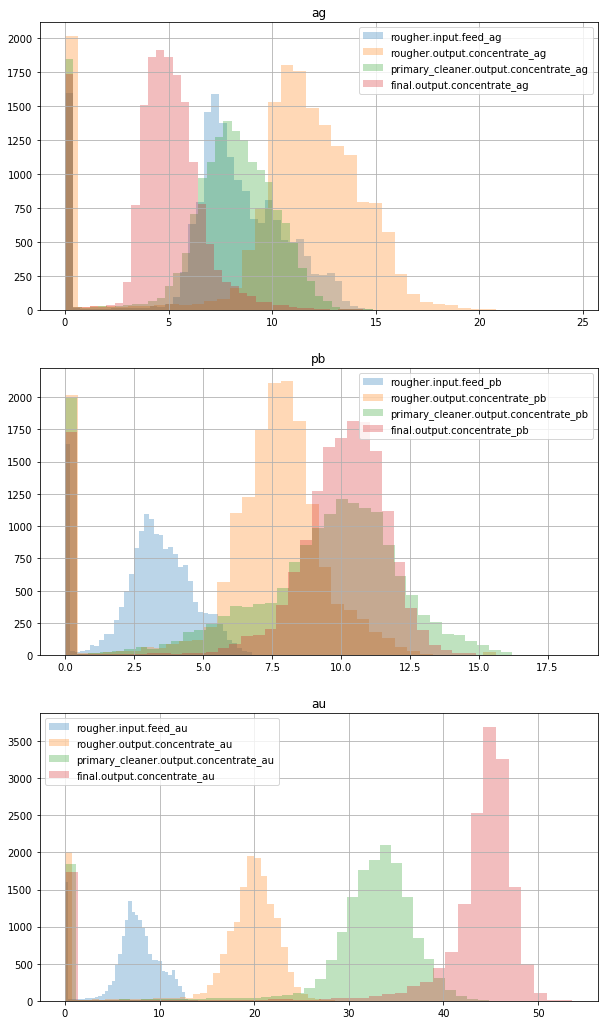

In [23]:
kwargs = dict(alpha=0.3, bins=40)
fig, axs = plt.subplots(3, figsize=(10,18))
for j, metal in enumerate(mat_columns.keys()):
    for i in range(4):
        axs[j].hist(mat_df[mat_columns[metal][i]], label=mat_columns[metal][i], **kwargs)
    axs[j].legend()
    axs[j].grid()
    axs[j].set_title(metal)

Note:
    
From the above histograms it is clearly visible that conecentration of Au increases each step continously. Which is obvious because this is Gold Extraction Process,

From the graph of Ag we can say that concentration of Ag also known as silver, slightly increases at the second stage but in the final stage it decreases. It shows that we were able to filter out some amount of Ag before final stage,

Concentration of Pb increases slightly at the second stage and it remains constant at the later stages

2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

Training Set Feed Particle Size distribution:

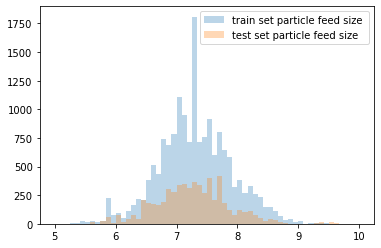

In [24]:
kwargs = dict(alpha=0.3, bins=60, range=(5, 10))
plt.hist(train_df['primary_cleaner.input.feed_size'], label='train set particle feed size ', **kwargs)
plt.hist(test_df['primary_cleaner.input.feed_size'], label='test set particle feed size', **kwargs)
plt.legend()
plt.show()

Conclusion:

From above graph we can say that training and test set having similar distribution of particle feed size. So it does not very significantly so our model calculation will not be wrong

2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.

Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [25]:
full_df['total_raw_feed'] = full_df[[
    'rougher.input.feed_ag','rougher.input.feed_pb', 
    'rougher.input.feed_au', 'rougher.input.feed_sol']].sum(axis = 1, skipna = True)
full_df['total_rougher_output'] = full_df[[
    'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 
    'rougher.output.concentrate_au','rougher.output.concentrate_sol']].sum(axis = 1, skipna = True)
full_df['total_final_output'] = full_df[[
    'final.output.concentrate_ag','final.output.concentrate_pb', 
    'final.output.concentrate_au','final.output.concentrate_sol']].sum(axis = 1, skipna = True)
total_column_name = ['total_raw_feed', 'total_rougher_output', 'total_final_output']

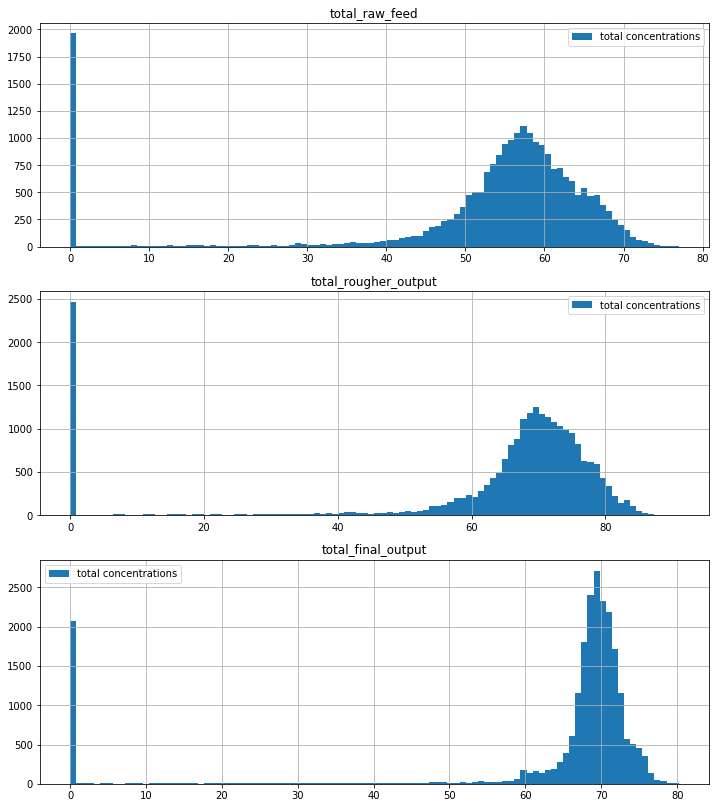

In [26]:
fig, axs = plt.subplots(3, figsize=(12,14))
for k in range(3):
    axs[k].hist(full_df[total_column_name[k]], bins=100, label="total concentrations")
    axs[k].set_title(total_column_name[k])
    axs[k].legend()
    axs[k].grid()

Conclusion:

From above graph we can say that total_distribution has some outliers, lets find the range which can be eliminated
We have some incorrect value since concentration can not be zero at any stage.

We need to drop zero values in the distribution since it indicates incorrect value. It always safe to drop incorrect value

In [27]:
full_df = full_df.query('total_raw_feed>0 and total_rougher_output>0 and total_final_output>0')

Lets Plot Boxplot and quickly check the outlier range:

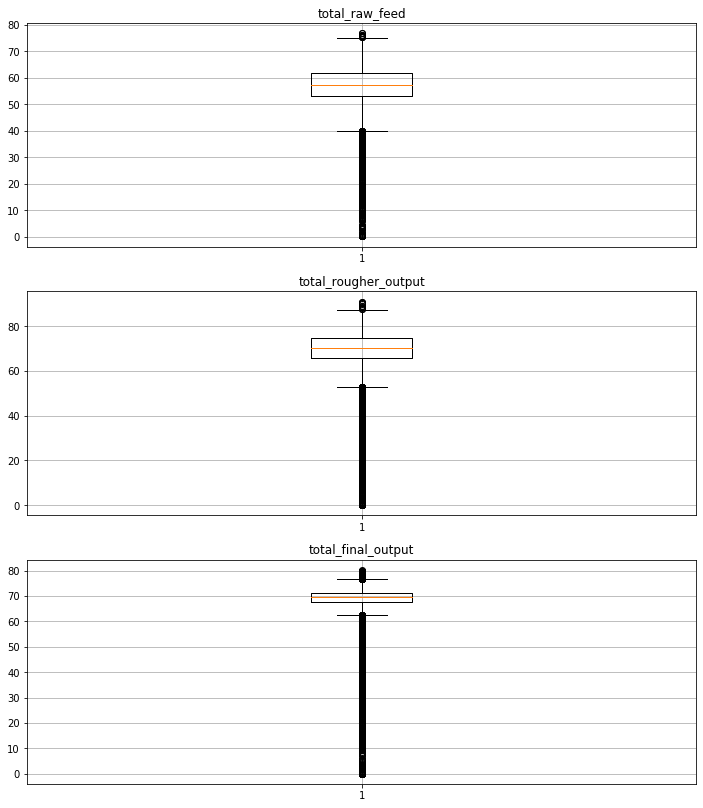

In [28]:
fig, axs = plt.subplots(3, figsize=(12,14))
for k in range(3):
    axs[k].boxplot(full_df[total_column_name[k]])
    axs[k].set_title(total_column_name[k])
    axs[k].grid()

Observations:
    
Column Name  	Safe Lower Limit	Safe Upper Limit

total_raw_feed 	40	77

total_rougher_output	48	90

total_final_output	62	78

Lets eliminate top 3% outliers from lower limit and analyse distribution:

In [29]:
filter_full_df = full_df.query('total_raw_feed>=10')
print("{}% rows are removed from total_raw_feed".format((1 - len(filter_full_df)/len(full_df))*100))
filter_full_df = full_df.query('total_rougher_output>=5')
print("{}% rows are removed from total_rougher_output".format((1 - len(filter_full_df)/len(full_df))*100))
filter_full_df = full_df.query('total_final_output>=15')
print("{}% rows are removed from total_final_output".format((1 - len(filter_full_df)/len(full_df))*100))

2.0470127326150833% rows are removed from total_raw_feed
2.3163565132223285% rows are removed from total_rougher_output
2.340842311459357% rows are removed from total_final_output


In [30]:
filter_full_df = full_df.query('total_raw_feed>=10 and total_rougher_output>=5 and total_final_output>=15')
print("{}% rows are removed from all column".format((1 - len(filter_full_df)/len(full_df))*100))

2.9970617042115566% rows are removed from all column


we can drop 3% of data as it seems outliers


Lets observe distributions after removing outliers

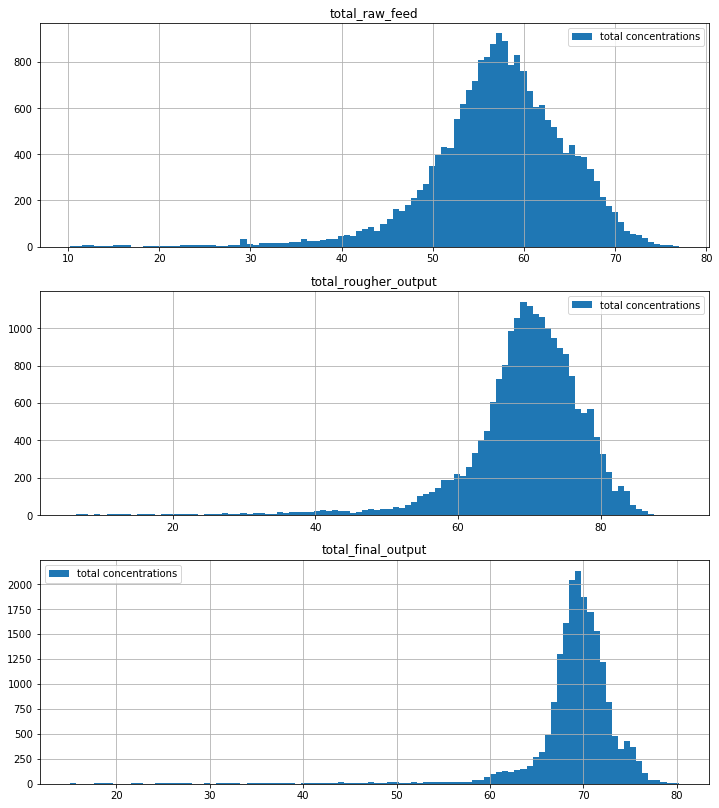

In [31]:
fig, axs = plt.subplots(3, figsize=(12,14))
for k in range(3):
    axs[k].hist(filter_full_df[total_column_name[k]], bins=100, label="total concentrations")
    axs[k].set_title(total_column_name[k])
    axs[k].legend()
    axs[k].grid()

Conclusion:

    
After Removing Outliers the distribution seems much better

Lets remove Outliers from train and testset:

In [32]:
filtered_dates = set(list(filter_full_df.date))

In [33]:
filter_full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total_raw_feed,total_rougher_output,total_final_output
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


In [34]:
train_df.date.apply(lambda date:date in filtered_dates).value_counts()

True     14540
False     2320
Name: date, dtype: int64

In [35]:
filtered_train_df = train_df[train_df.date.apply(lambda date:date in filtered_dates)]

In [36]:
test_df.date.apply(lambda date:date in filtered_dates).value_counts()

True     5268
False     588
Name: date, dtype: int64

In [37]:
filtered_test_df = test_df[test_df.date.apply(lambda date:date in filtered_dates)]

Conclusion:

    
We removed incorrect values and outliers from the dataset and make data better

Prepare Data for Training and Testing:

In [38]:
req_columns = list(filtered_test_df.columns)
req_columns.remove('date')

In [39]:
# get features and target
train_X = filtered_train_df[req_columns]
train_y = filtered_train_df[['rougher.output.recovery', 'final.output.recovery']]
print(len(train_X), len(train_y))
train_y.head()

14540 14540


,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [40]:
dummy_full_df = filter_full_df.copy()
dummy_test_df = filtered_test_df.copy()

In [41]:
dummy_full_df = dummy_full_df.set_index('date')
dummy_test_df = dummy_test_df.set_index('date')
test_target = (dummy_full_df.loc[dummy_test_df.index][['rougher.output.recovery', 'final.output.recovery']])
test_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


In [42]:
test_X = filtered_test_df[req_columns]
test_y = test_target.reset_index(drop=True)
print(len(test_X), len(test_y))
test_y.head()

5268 5268


,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


In [43]:
train_y=np.array(train_y)
test_y=np.array(test_y)

3. Build the model:

3.1. Write a function to calculate the final sMAPE value.

In [44]:
def smape_score(y, y_pred):
    smape = np.mean(np.abs(y - y_pred)/((np.abs(y)+np.abs(y_pred))/2)) * 100
    return smape
def final_smape_score(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

In [45]:
smape_scorer = make_scorer(smape_score, greater_is_better=False)

3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

Lets Select Best Model for rougher.output.recovery Prediction

In [46]:
train_X_1 = train_X.copy()
train_y_1 = train_y[:, 0]

train_X_2 = train_X.copy()
train_X_2['rougher.output.recovery'] = train_y[:, 0]
train_y_2 = train_y[:, 1]

In [47]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('CART', RandomForestRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, train_X_1, train_y_1, cv=kfold, scoring=smape_scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -7.341554 (1.471185)
ScaledLASSO: -7.395299 (1.221616)
ScaledEN: -7.057723 (1.361766)
ScaledKNN: -8.119845 (2.444282)
ScaledRFR: -8.399017 (1.686913)
ScaledGBM: -6.912075 (1.710636)


From above experiment we can say that GradientBoostingRegressor gives us better results,


The following step might take a little time

Lets get best Hyperparameters

In [56]:
scaler = StandardScaler().fit(train_X_1)
rescaledX = scaler.transform(train_X_1)
param_grid = dict(n_estimators=np.array([50,100,200]))

model = GradientBoostingRegressor(random_state=12345)
kfold = KFold(n_splits=10, random_state=12345)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=smape_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, train_y_1)

smape_r = grid_result.best_score_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-6.880864 (1.568698) with: {'n_estimators': 50}
-6.966585 (1.786895) with: {'n_estimators': 100}
-7.266590 (2.213570) with: {'n_estimators': 200}
Best: -6.880864 using {'n_estimators': 50}


We are getting best result at 'n_estimators': 50

Train Model for rougher.output.recovery Prediction:

In [57]:
scaler1 = StandardScaler().fit(train_X_1)
rescaled_X_1 = scaler1.transform(train_X_1)

scaler2 = StandardScaler().fit(train_X_2)
rescaled_X_2 = scaler2.transform(train_X_2)

In [58]:
model_1 = GradientBoostingRegressor(random_state=12345, n_estimators=50)
model_1.fit(rescaled_X_1, train_y_1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=12345, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Lets Select Best Model for final.output.recovery Prediction:
    
We will userougher.output.recovery column in the training dataset for the second model

In [51]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('CART', RandomForestRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, train_X_2, train_y_2, cv=kfold, scoring=smape_scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -9.753488 (2.013632)
ScaledLASSO: -8.515611 (1.298815)
ScaledEN: -8.844989 (1.221310)
ScaledKNN: -11.266481 (2.152914)
ScaledRFR: -9.357353 (1.334554)
ScaledGBM: -8.878788 (1.417257)


In [52]:
param_grid = dict(n_estimators=np.array([50,100,200]))

model = GradientBoostingRegressor(random_state=12345)
kfold = KFold(n_splits=10, random_state=12345)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=smape_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, train_y_2)

smape_f = grid_result.best_score_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-9.610701 (1.376196) with: {'n_estimators': 50}
-9.994290 (1.650636) with: {'n_estimators': 100}
-10.385156 (2.030863) with: {'n_estimators': 200}
Best: -9.610701 using {'n_estimators': 50}


In [53]:
model_2 = GradientBoostingRegressor(random_state=12345, n_estimators=50)
model_2.fit(rescaled_X_2, train_y_2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=12345, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
#from the GradientBoostingRegressor best score while validation
final_smape_score(smape_r, smape_f)

-8.928241570934148

In [55]:
Create Result with Baseline Model

SyntaxError: invalid syntax (<ipython-input-55-7bf94ef12bbc>, line 1)

In [ ]:
test_X_1 = test_X.copy()
test_y_1 = test_y[:, 0]
test_X_2 = test_X.copy()
test_X_2['rougher.output.recovery'] = test_y[:, 0]
test_y_2 = test_y[:, 1]

In [ ]:
median_y_1 = train_y_1.mean()
median_y_2 = train_y_2.mean()

In [ ]:
dummy_pred_y_1 = pd.Series(median_y_1, index=pd.Series(train_y_1).index)
dummy_pred_y_2 = pd.Series(median_y_2, index=pd.Series(train_y_2).index)

In [ ]:
dummy_pred_y_1[:10]

In [ ]:
train_y_1[:10]

In [ ]:
smape_r = smape_score(train_y_1, dummy_pred_y_1)
smape_f = smape_score(train_y_2, dummy_pred_y_2)

In [ ]:
final_smape_score(smape_r, smape_f)

In [ ]:
pd.Series(train_y_1).hist(bins=100)

Test Model

In [ ]:
scaled_train_X_1 = scaler1.transform(test_X_1)
scaled_train_X_2 = scaler2.transform(test_X_2)

In [ ]:
pred_y_1 = model_1.predict(scaled_train_X_1)
pred_y_2 = model_2.predict(scaled_train_X_2)

In [ ]:
smape_r = smape_score(test_y_1, pred_y_1)
smape_f = smape_score(test_y_2, pred_y_2)

In [ ]:
final_smape_score(smape_r, smape_f)

Observations:
    
We got around 6.4 final sMAPE score for the test results with GradientBoostingRegressor estimator.

Final Conclusion:
    
We got around 6.4 final sMAPE score for the test results with GradientBoostingRegressor estimator. Which is better than model baseline score.

We found that particle feed size distribution for train and test set are similar

Conecentration of Au increases each step continously. Concentration of Ag slightly increases at the second stage but in the final stage it decreases. Concentration of Pb increases slightly at the second stage and it remains constant at the later stages

We removed incorrect values and outliers from the dataset and make data better